In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/darknet

!unzip "/content/drive/MyDrive/Colab Notebooks/darknet.zip" -d "/content/darknet"

Archive:  /content/drive/MyDrive/Colab Notebooks/darknet.zip
  inflating: /content/darknet/.circleci/config.yml  
  inflating: /content/darknet/.git/config  
  inflating: /content/darknet/.git/description  
 extracting: /content/darknet/.git/HEAD  
  inflating: /content/darknet/.git/hooks/applypatch-msg.sample  
  inflating: /content/darknet/.git/hooks/commit-msg.sample  
  inflating: /content/darknet/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/darknet/.git/hooks/post-update.sample  
  inflating: /content/darknet/.git/hooks/pre-applypatch.sample  
  inflating: /content/darknet/.git/hooks/pre-commit.sample  
  inflating: /content/darknet/.git/hooks/pre-merge-commit.sample  
  inflating: /content/darknet/.git/hooks/pre-push.sample  
  inflating: /content/darknet/.git/hooks/pre-rebase.sample  
  inflating: /content/darknet/.git/hooks/pre-receive.sample  
  inflating: /content/darknet/.git/hooks/prepare-commit-msg.sample  
  inflating: /content/darknet/.git/hooks/push-to-c

In [ ]:
%cd /content/darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1' Makefile

!make
!chmod +x ./darknet

/content/darknet
sed: -e expression #1, char 17: unterminated `s' command
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not g

In [ ]:
!rm -rf /content/darknet/backup
!ln -s /content/drive/'MyDrive'/YOLO/backup /content/darknet

In [ ]:
!sudo apt install dos2unix

!dos2unix ./data/list/train.txt
!dos2unix ./data/list/valid.txt
!dos2unix ./data/list/test.txt
!dos2unix ./data/class.names
!dos2unix ./data/dog.data
!dos2unix ./cfg/yolov3.cfg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (449 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 155222 files and directories curren

In [ ]:
def imShow(path): 
  import cv2 
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd /content/darknet

!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2021-12-04 01:16:55--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  57.9MB/s    in 2.7s    

2021-12-04 01:16:58 (57.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%cd /content/darknet

!time ./darknet detector train data/dog.data cfg/yolov3.cfg darknet53.conv.74 -dont_show -map l tee train.log

!cp -r /content/darknet/train.log /content/drive/'MyDrive'/YOLO/backup/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 44299, rewritten_bbox = 0.020316 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.894802), count: 1, class_loss = 0.000100, iou_loss = 0.007326, total_loss = 0.007425 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000563, iou_loss = 0.000000, total_loss = 0.000563 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 44300, rewritten_bbox = 0.020316 % 
v3 (mse loss, Normaliz

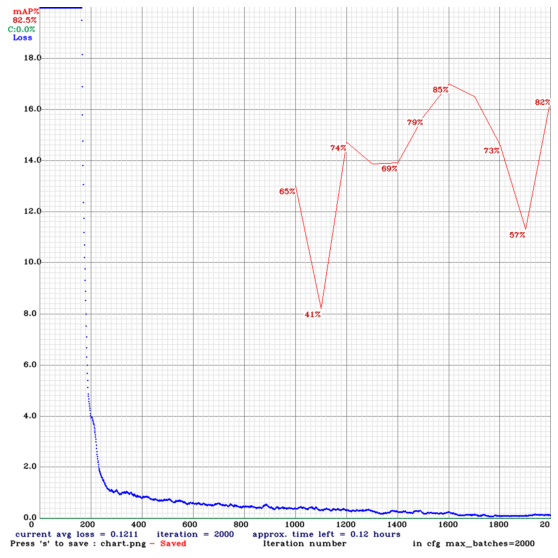

In [ ]:
imShow('chart.png')

In [ ]:
!time ./darknet detector demo data/dog.data cfg/yolov3.cfg backup/yolov3_final.weights data/test.mp4 -out_filename result.mp4 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 12